# Example 03-10

A firm use lathes, milling and grinding machines to produce two machine parts. The following table represents the machining times required for each part, the machining times available on different machines and the profit on each machine part



$$ \max Z = 40x_1 + 100x_2 $$

\begin{align}
12x_1 + 6x_2 &\leq 3000 \\
4x_1 + 10x_2 &\leq 2000 \\
2x_1 + 3x_2 &\leq 900 
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Domain
x =np.linspace(0, 600, 200)

In [3]:
# Constraints
eq1 = (3000 - 12*x) /  6   # x2 <=
eq2 = (2000 -  4*x) / 10   # x2 <=  
eq3 = ( 900 -  2*x) /  3   # x2 <=

In [4]:
# z equation  --> Z = 40x1 + 100x2
zeq = lambda x1, c: (c - 40*x1) / 100

In [5]:
# 
equations_list = [(x, eq1),
                  (x, eq2),
                  (x, eq3),
                  ]

# labels
equations_label = [r"$12x_1 + 6x_2 = 3000$",
                   r"$4x_1 + 10x_2 = 2000$",
                   r"$2x_1 + 3x_2 = 900$",
                   ]   

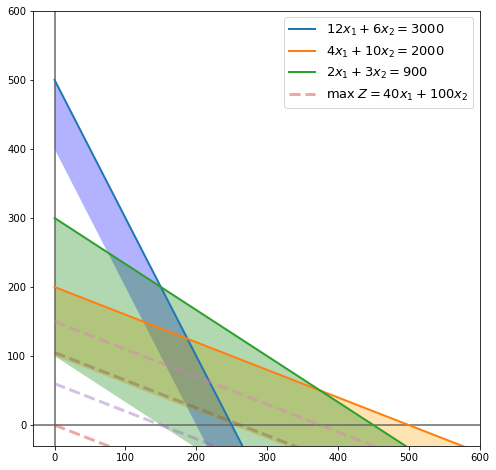

In [6]:
# Plot
plt.figure(figsize=(8, 8))
plt.axvline(0, color="0.4")
plt.axhline(0, color="0.4")

# equations
for eq, eqlabel in zip(equations_list, equations_label):
    plt.plot(*eq, lw=2, label=eqlabel)

# z function
plt.plot(x, zeq(x, 0), lw=3, alpha=0.4, ls="--", label=r"$\max\; Z = 40x_1 + 100x_2$")
for z in np.linspace(6000, 15000, 3):
    plt.plot(x, zeq(x, z), lw=3, alpha=0.4, ls="--")
# areas
plt.fill_between(x, eq1, eq1 - 100, facecolor="blue", alpha=0.3)
plt.fill_between(x, eq2, eq2 - 100, facecolor="orange", alpha=0.3)
plt.fill_between(x,eq3, eq3  - 200, facecolor="green", alpha=0.3)
#
plt.xlim(-30, 600)
plt.ylim(-30, 600)
plt.legend(fontsize=13, loc="upper right")
plt.show()

In [7]:
# coefficient matrix
A = np.array([
    [12,  6],   # blue    0
    [ 4, 10],   # orange  1
    [ 2,  3],   # green   2
    [ 0,  1],   # xAxis   3
    [ 1,  0],   # yAxis   4
    ])
# right-hand side
b = np.array([3000,
              2000,
               900,
                 0,
                 0,
              ])
# intersections
intersecting_lines = [(3, 4),   # xAxis  vs yAxis
                      (3, 0),   # xAxis  vs blue 
                      (1, 0),   # orange vs blue
                      (4, 1),   # yAxis  vs orange
                      ]

In [8]:
points = np.array([np.linalg.solve(A[[*i]], b[[*i]]) for i in intersecting_lines])
zvalues = np.array([point.dot(np.array([40, 100])) for point in points])
best_index, best_value = zvalues.argmax(), zvalues.max()
best_point = points[best_index]
coordinates = [*zip(*points)]

In [9]:
best_indexes = np.where(zvalues == best_value)[0]
best_values = zvalues[best_indexes]

best_points = points[best_indexes]

mask_x = x <= best_points[0,0]
mask_y = eq2 >= best_points[0,1]
optimalx = x[mask_x]
optimaly = eq2[mask_y]
multiple = [*zip(optimalx, optimaly)]

for i in np.arange(0, 60, 10):
    vector = np.array(multiple[i]) 
    print(vector.dot(np.array([40, 100])))

20000.0
20000.000000000004
20000.0
20000.0
20000.0
20000.0


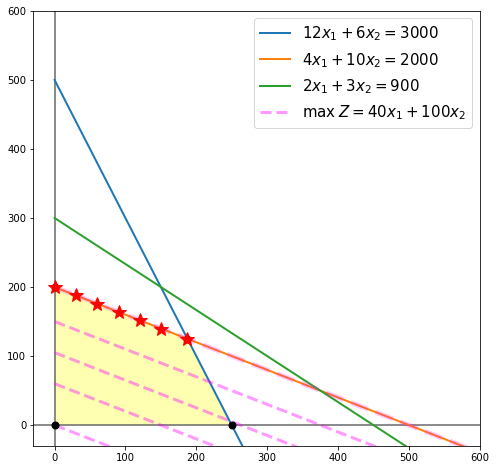

In [10]:
# Plot
plt.figure(figsize=(8,8))
plt.axvline(0, color="0.4")
plt.axhline(0, color="0.4")

# equations
for eq, eqlabel in zip(equations_list, equations_label):
    plt.plot(*eq, lw=2, label=eqlabel)

# z function
plt.plot(x, zeq(x, 0), lw=3, ls="--", color="magenta", alpha=0.4,  label=r"$\max\; Z = 40x_1 + 100x_2$")
for z in np.linspace(6000, 15000, 3):
    plt.plot(x, zeq(x, z), lw=3, ls="--", color="magenta", alpha=0.4)
# best z function
plt.plot(x, zeq(x, best_value), lw=5, ls="--", color="magenta", alpha=0.2)

# feasible area
plt.fill(*coordinates, facecolor="yellow", alpha=0.3 )

# corner points
for point in points:
    plt.plot(*point, color="k", marker="o", ms=7)
# best point (optimal)
plt.plot(*best_point, color="red", marker="*",ms=15)

# ------------------------------------------------
# multiple optimal points
for i in np.arange(0, 60, 10):
    plt.plot(*multiple[i], color="red", marker="*", ms=15)
# ------------------------------------------------
plt.xlim(-30, 600)
plt.ylim(-30, 600)
plt.legend(fontsize=15, loc="upper right")
plt.show()